In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import seaborn as sns
import matplotlib.pyplot as plt
PW = 8
PH = 6
plt.rcParams['figure.figsize'] = (PW, PH) 
plt.rcParams['image.cmap'] = 'gray'

import re
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
pd.options.display.max_rows = 250
pd.options.display.max_columns = 500
pd.options.display.max_colwidth = 500

from nltk.tokenize import RegexpTokenizer
import string 

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("./"))

# Any results you write to the current directory are saved as output.

['.ipynb_checkpoints', 'mbti_1.csv', 'PT.ipynb']


In [2]:
df = pd.read_csv("./mbti_1.csv", encoding="utf-8")
print("Number of users", len(df))

Number of users 8675


## Split Posts

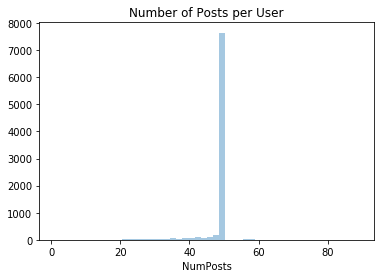

In [3]:
#Number of Posts per User
df["NumPosts"] = df["posts"].apply(lambda x: len(x.split("|||")))
sns.distplot(df["NumPosts"], kde=False).set_title("Number of Posts per User");

In [4]:
# #Split to posts
# def extract(posts, new_posts):
#     for post in posts[1].split("|||"):
#         new_posts.append((posts[0], post))

# posts = []
# df.apply(lambda x: extract(x, posts), axis=1)
# print("Number of users", len(df), "Number of posts", len(tors))

# df = pd.DataFrame(posts, columns=["type", "posts"])

## Explore

In [5]:
df.head(3)

,type,posts,NumPosts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||http://41.media.tumblr.com/tumblr_lfouy03PMA1qa1rooo1_500.jpg|||enfp and intj moments https://www.youtube.com/watch?v=iz7lE1g4XM4 sportscenter not top ten plays https://www.youtube.com/watch?v=uCdfze1etec pranks|||What has been the most life-changing experience in your life?|||http://www.youtube.com/watch?v=vXZeYwwRDw8 http://www.youtube.com/watch?v=u8ejam5DP3E On repeat for most of today.|||May the PerC Experience immerse you.|||The last ...,50
1,ENTP,'I'm finding the lack of me in these posts very alarming.|||Sex can be boring if it's in the same position often. For example me and my girlfriend are currently in an environment where we have to creatively use cowgirl and missionary. There isn't enough...|||Giving new meaning to 'Game' theory.|||Hello *ENTP Grin* That's all it takes. Than we converse and they do most of the flirting while I acknowledge their presence and return their words with smooth wordplay and more cheeky grins.|||This...,50
2,INTP,"'Good one _____ https://www.youtube.com/watch?v=fHiGbolFFGw|||Of course, to which I say I know; that's my blessing and my curse.|||Does being absolutely positive that you and your best friend could be an amazing couple count? If so, than yes. Or it's more I could be madly in love in case I reconciled my feelings (which at...|||No, I didn't; thank you for a link!|||So-called Ti-Si loop (and it can stem from any current topic/obsession) can be deadly. It's like when you're stuck in your o...",50


In [6]:
#Personality Types
groups = df.groupby("type").count()
groups.sort_values("posts", ascending=False, inplace=True)
print ("Personality types", groups.index.values)
#Priors
priors = groups["posts"] / groups["posts"].sum()

Personality types ['INFP' 'INFJ' 'INTP' 'INTJ' 'ENTP' 'ENFP' 'ISTP' 'ISFP' 'ENTJ' 'ISTJ'
 'ENFJ' 'ISFJ' 'ESTP' 'ESFP' 'ESFJ' 'ESTJ']


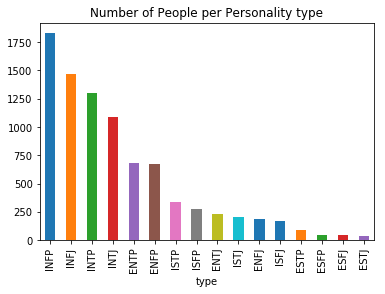

In [7]:
groups["posts"].plot(kind="bar", title="Number of People per Personality type");

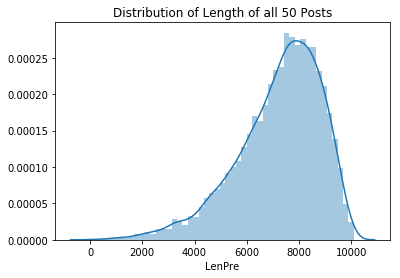

In [8]:
df["LenPre"] = df["posts"].apply(len)
sns.distplot(df["LenPre"]).set_title("Distribution of Length of all 50 Posts");

In [39]:
#Read Again
df = pd.read_csv("./mbti_1.csv", encoding="utf-8")
df["LenPre"] = df["posts"].apply(len)

## Link Removal

In [40]:
#Remove links 
df["postsM"] = df["posts"].apply(lambda x: re.sub(r'https?:\/\/.*?[\s+]', '', x.replace("|"," ") + " "))

#Check remaining posts for 'http'
df_http = df[df["postsM"].apply(lambda x: "http" in x)]
print("Number of posts containing 'http' ",len(df_http))

Number of posts containing 'http'  8


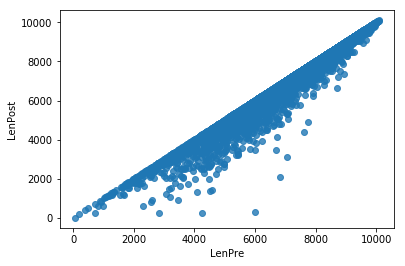

In [41]:
#Plot length reduction
df["LenPre"] = df["posts"].apply(len)
df["LenPost"] = df["postsM"].apply(len)

sns.regplot("LenPre", "LenPost", df, fit_reg=False);

In [42]:
# #Check Higly Reduced
# df["PercRem"] = df["LenPost"] * 1.0 / df["LenPre"]
# df[df["PercRem"] < 0.2].head(3)

In [43]:
#Clean Up
df["posts"] = df["postsM"]
df["LenPre"] = df["LenPost"]
df.drop(["postsM", "LenPost"], axis=1, inplace=True)

## Extract Words

In [47]:
df.head(30)

,type,posts,LenPre
0,INFJ,moments sportscenter plays pranks what been most lifechanging experience your life repeat most today perc experience immerse last thing friend posted facebook before committing suicide next rest peace hello sorry hear your distress only natural relationship perfection time every moment existence figure hard times times growth welcome stuff game match prozac wellbrutin least thirty minutes moving your legs d...,3401
1,ENTP,finding lack these posts very alarming boring same position often example girlfriend currently environment where have creatively cowgirl missionary there isnt enough giving meaning game theory hello grin thats takes than converse they most flirting while acknowledge their presence return their words with smooth wordplay more cheeky grins this lack balance hand coordination real test score internet tests funny score higher like for...,6451
2,INTP,good course which know thats blessing curse does being absolutely positive that your best friend could amazing couple count than more could madly love case reconciled feelings which didnt thank link socalled tisi loop stem from current topicobsession deadly like when youre stuck your thoughts your mind just wanders circles feels truly terrible have noticed peculiar vegetation have look down grass dozens different plant spe...,5060
3,INTJ,dear enjoyed conversation other esoteric gabbing about nature universe idea that every rule social code being arbitrary constructs created dear long time sincerely alpha none them other types hurt deep existential ways that want part probably sliding scale that depends individual preferences like everything humanity draco malfoy also either either though which stacking somewhat arbitrary distinction make believe that core indicates p...,6184
4,ENTJ,youre fired thats another silly misconception that approaching logically going unlocking whatever think entitled nobody wants approached with guys really wants superduperlongass vacation cmon guys boss just doesnt listen even approached logically everything never mind just permanent vacation months wouldnt crazy about idea really best employee then thats what cooking wants their most reliable asset gone that long employer like vie...,5727
5,INTJ,science perfect scientist claims that that scientific information will revised discover things rational thinking been very useful society edgar allen your siggy people obvious quick agree that compare haku definite flat through most naruto dont lets this party started disproved merely said that found such methods disturbing although does bring certain questions control universe governments world surpri...,8515
6,INFJ,cant draw nails haha those were done professionals nails those mean those posted were done yourself your nails awesome probably electronic screen syndrome with advent technology social media suffer from overstimulation daily basis guilty well past happy just love nail arts these some mine this first time hearing this about menstruation church thanks sharing yeah crazy thought only taoists have such belief dear very person tryin...,7759
7,INTJ,tend build collection things desktop that frequently then move them into folder called everything from there sorted into type type collect objects even worka people would call junk like collect unused software take that your hands have bunch adobe think quite normal tend only friends real life every couple months said earlier some people just dont good ones edit mostly mean tolerate where when sleep dreaming another form bein...,6857
8,INFJ,sure thats good question distinction between dependant perception quote robb flynn hate feel nothing more than love feel this good question tough sure loved winona ryder lydia beetlejuice been lonely much time while been working changing think trying find positive everything matter bleak might seem hope look back this current stretch time think thank there anymore things much better what asskickin taking help voice ...,4267
9,INTP,this 

In [45]:
#Strip Punctation
df["posts"] = df["posts"].apply(lambda x: re.sub(r'[^\w\s]','',x))

#Remove Non-words
df["posts"] = df["posts"].apply(lambda x: re.sub(r'[^a-zA-Z\s]','',x))

#To lower
df["posts"] = df["posts"].apply(lambda x: x.lower())

#Remove multiple letter repating words
df["posts"] = df["posts"].apply(lambda x: re.sub(r'([a-z])\1{2,}[\s|\w]*','',x)) 

#Remove short/long words
df["posts"] = df["posts"].apply(lambda x: re.sub(r'(\b\w{0,3})?\b','',x)) 
df["posts"] = df["posts"].apply(lambda x: re.sub(r'(\b\w{30,1000})?\b','',x))

In [46]:
#Remove Type Hot Words
pers_types = ['INFP' ,'INFJ', 'INTP', 'INTJ', 'ENTP', 'ENFP', 'ISTP' ,'ISFP' ,'ENTJ', 'ISTJ','ENFJ', 'ISFJ' ,'ESTP', 'ESFP' ,'ESFJ' ,'ESTJ']
pers_types = [p.lower() for p in pers_types]
p = re.compile("(" + "|".join(pers_types) + ")")

df["posts"] = df["posts"].apply(lambda x: p.sub('',x))

## BOW Model

In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import LabelEncoder, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from nltk.stem.snowball import SnowballStemmer

In [18]:
#Stem
stemmer = SnowballStemmer("english")

df["posts"] = df["posts"].apply(lambda x: " ".join(stemmer.stem(p) for p in x.split(" ")))

In [136]:
vect = CountVectorizer(stop_words='english', min_df =2) 
#vect = TfidfVectorizer(stop_words='english', min_df =0.0001)
X =  vect.fit_transform(df["posts"]) 

le = LabelEncoder()
y = le.fit_transform(df["type"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y, random_state=42)

In [167]:
#MonteCarlo
def predict_random_guess(priors, lp):
    return np.random.choice(priors.index, lp, p=priors.values)

np.mean(le.transform(predict_random_guess(priors, len(y_test))) == y_test)

0.12096774193548387

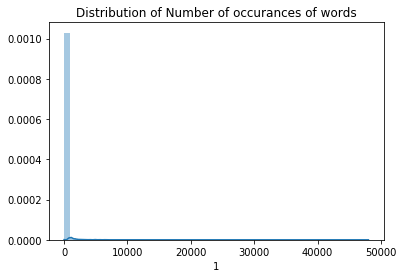

In [137]:
#Most frequent Words
#vect.vocabulary_.get(u'infj')
sum_words = X.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in vect.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
wfdf = pd.DataFrame(words_freq)
f = sns.distplot(wfdf[1]).set_title("Distribution of Number of occurances of words");

In [138]:
len(wfdf), len(wfdf[wfdf[1] > 1])

(42747, 42747)

In [139]:
clf = MultinomialNB(alpha=0.4, fit_prior=False)
clf.fit(X_train, y_train)

yp_train = clf.predict(X_train)
print("Train accuracy:", np.mean(yp_train == y_train))

yp_test = clf.predict(X_test)
print("Test accuracy:", np.mean(yp_test == y_test))
#Train accuracy: 0.8624311515306776
#Test accuracy: 0.34101382488479265

Train accuracy: 0.8772896118867682
Test accuracy: 0.32027649769585254


In [140]:
#Most Frequent words across personality Types
feature_names = vect.get_feature_names()
maxC = 250

print (len(feature_names))
mfw = set()
for i, cls in enumerate(clf.feature_log_prob_):
    print("PT:", le.inverse_transform(i), len(cls))
    tdf = pd.DataFrame({"word":feature_names, "freq":cls})
    tdf.sort_values("freq", ascending=False, inplace=True)
    tdf= tdf.reset_index()
    if len(mfw) == 0:
        mfw = set(tdf[0:maxC]["word"])
    else:
        mfw = mfw.intersection(set(tdf[0:maxC]["word"]))
    print(tdf[0:][["freq", "word"]].head(20))
print(len(mfw))

42747
PT: ENFJ 42747
        freq     word
0  -4.312919     like
1  -4.582907     just
2  -4.596608    think
3  -4.679670   people
4  -4.706680     dont
5  -4.927943   really
6  -4.934369     know
7  -5.122984     feel
8  -5.317103     love
9  -5.368828     time
10 -5.484788   things
11 -5.518895     want
12 -5.538358     good
13 -5.752307  friends
14 -5.833405   person
15 -5.838699    thats
16 -5.849371    youre
17 -5.854750     type
18 -5.871064     make
19 -5.893238    thing
PT: ENFP 42747
        freq     word
0  -4.095145     like
1  -4.332118     just
2  -4.421333    think
3  -4.504199     dont
4  -4.511215   people
5  -4.725173     know
6  -4.740868   really
7  -5.008421     love
8  -5.033540     time
9  -5.093825     feel
10 -5.321391   things
11 -5.398950     good
12 -5.414962     want
13 -5.516824    thats
14 -5.557509     type
15 -5.576298    youre
16 -5.622582    thing
17 -5.661534     make
18 -5.675936     life
19 -5.679165  friends
PT: ENTJ 42747
        freq    word
0  -

/home/brunno/anaconda2/envs/ana41py35/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/brunno/anaconda2/envs/ana41py35/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/brunno/anaconda2/envs/ana41py35/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/brunno/anaconda2/envs/ana41py35/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151

        freq    word
0  -4.281187    like
1  -4.488747    dont
2  -4.501645    just
3  -4.811052   think
4  -4.862470  people
5  -5.007506    know
6  -5.080042  really
7  -5.129469    time
8  -5.432537  things
9  -5.558103    good
10 -5.622351    feel
11 -5.632355    type
12 -5.719854    want
13 -5.742044    work
14 -5.795820    make
15 -5.840200   thats
16 -5.873760    love
17 -5.886642   going
18 -5.939893   thing
19 -5.958293   youre
PT: ISTP 42747
        freq    word
0  -4.258787    like
1  -4.337587    dont
2  -4.357487    just
3  -4.633481   think
4  -4.656820  people
5  -4.927333  really
6  -4.947012    know
7  -5.095451    time
8  -5.380695    good
9  -5.426837  things
10 -5.519808    want
11 -5.579604    type
12 -5.586228   thats
13 -5.666935   youre
14 -5.679015  pretty
15 -5.752114    feel
16 -5.773257    make
17 -5.786701    love
18 -5.822528   thing
19 -5.877312   right
138


/home/brunno/anaconda2/envs/ana41py35/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [141]:
for i, cls in enumerate(clf.feature_log_prob_):
    print("PT:", le.inverse_transform(i), len(cls))
    tdf = pd.DataFrame({"word":feature_names, "freq":cls})
    tdf.sort_values("freq", ascending=False, inplace=True)
    tdf= tdf.reset_index()
    tdf = tdf[tdf.word.apply(lambda x: not(x in mfw))]
    print(tdf[0:][["freq", "word"]].head(20))

/home/brunno/anaconda2/envs/ana41py35/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/brunno/anaconda2/envs/ana41py35/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/brunno/anaconda2/envs/ana41py35/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/brunno/anaconda2/envs/ana41py35/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151

PT: ENFJ 42747
         freq        word
63  -6.540375        haha
69  -6.595394    feelings
81  -6.754459        tend
90  -6.823073        hope
95  -6.866621        shes
97  -6.866621       world
98  -6.881569        told
102 -6.912152      strong
108 -6.943701       using
112 -6.976277       music
113 -6.992972      change
114 -6.992972     problem
118 -7.027222       today
127 -7.080902   situation
129 -7.099455     totally
131 -7.118359        sent
132 -7.137628      figure
134 -7.137628  completely
136 -7.157275        song
137 -7.177316        head
PT: ENFP 42747
         freq        word
57  -6.321246       world
59  -6.336731        haha
100 -6.757290     totally
102 -6.781342        tend
114 -6.883785    feelings
116 -6.889194       music
117 -6.894631     problem
118 -6.900099       funny
123 -6.939232        shes
124 -6.944949        went
125 -6.944949       crazy
128 -6.956484        cool
129 -6.956484      social
131 -6.968152     awesome
132 -6.974038  completely
135 -6.9

/home/brunno/anaconda2/envs/ana41py35/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/brunno/anaconda2/envs/ana41py35/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/brunno/anaconda2/envs/ana41py35/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/brunno/anaconda2/envs/ana41py35/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151

         freq        word
68  -6.615578        tend
87  -6.801790   functions
91  -6.877699       world
94  -6.893598        shes
101 -6.942869     problem
103 -6.942869    feelings
109 -6.959847  completely
110 -6.977119       using
122 -7.087525        hope
123 -7.087525     certain
124 -7.087525      likely
125 -7.087525       hello
127 -7.107172       music
129 -7.107172    inferior
132 -7.147663     example
135 -7.147663     depends
136 -7.168541       based
139 -7.189864    thoughts
142 -7.189864        went
143 -7.211651        open
PT: ISFP 42747
         freq       word
34  -6.212631      music
84  -6.740602       song
86  -6.769202       haha
93  -6.818766   feelings
95  -6.828981       tend
98  -6.839301      world
110 -6.937312    problem
111 -6.948819       shes
112 -6.948819    started
117 -6.972240       cool
118 -6.972240       perc
120 -6.972240  functions
126 -7.045983      using
129 -7.058820     change
132 -7.098351       play
135 -7.125601      sound
137 -7.125601 

/home/brunno/anaconda2/envs/ana41py35/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/brunno/anaconda2/envs/ana41py35/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/brunno/anaconda2/envs/ana41py35/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [131]:
clf = SGDClassifier(alpha=0.01)
clf.fit(X_train, y_train)

yp_train = clf.predict(X_train)
print("Train accuracy:", np.mean(yp_train == y_train))

yp_test = clf.predict(X_test)
print("Test accuracy:", np.mean(yp_test == y_test))
#Train accuracy: 0.8274625336236711
#Test accuracy: 0.40898617511520735

/home/brunno/anaconda2/envs/ana41py35/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Train accuracy: 0.9322402971692071
Test accuracy: 0.32027649769585254


## Plot Predictions

In [142]:
dft = pd.DataFrame(le.inverse_transform(yp_test),columns=["pred"])
dft["cnt"] =  1
dft["same"] = (yp_test == y_test)
dft["same"] = dft["same"].astype(int)

groupsn = dft.groupby("pred").sum()
groupsn.sort_values("cnt", ascending=False, inplace=True)
#sns.distplot( , kde=False);

/home/brunno/anaconda2/envs/ana41py35/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


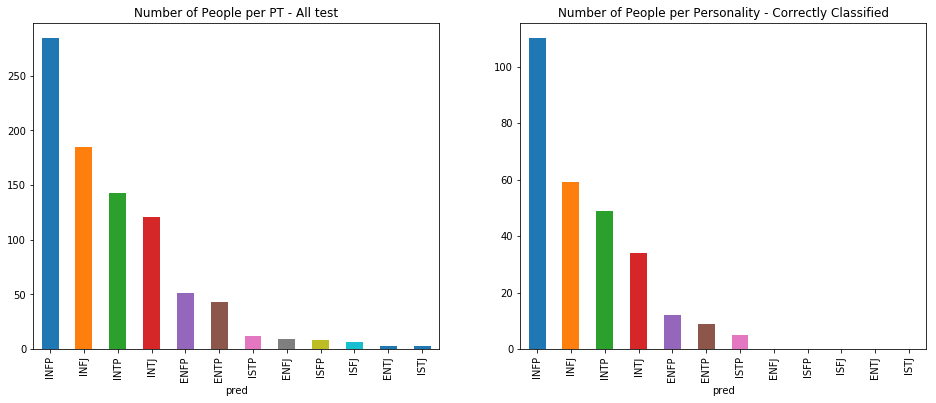

In [168]:
f, ax = plt.subplots(1,2,figsize=(2*PW,PH))
groupsn["cnt"].plot(kind="bar", title="Number of People per PT - All test", ax=ax[0]);
groupsn["same"].plot(kind="bar", title="Number of People per Personality - Correctly Classified", ax=ax[1]);
#groups["posts"].plot(kind="bar", title="Number of People per Personality type", ax=ax[2]);

## Count Analysis

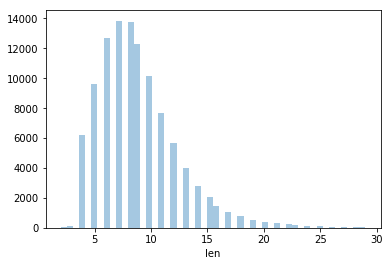

In [80]:
wdf = pd.DataFrame( vect.get_feature_names(),columns=["word"])
wdf["len"] = wdf.word.apply(len)
sns.distplot(wdf["len"], kde=False);